In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

print((np.trace(np.dot(A.T,A)))** (1/2))
print(np.linalg.norm(A, 'fro'))

16.881943016134134
16.881943016134134


Problema 4
1. Sea $H_n(i, j)=\frac{1}{i+j-1}$, llamada la matriz de Hilbert. Simule 1000 datos normales con matriz de covarianza $H_n$. Estime la matriz de covarianzas desde los datos simulados. Realice una gráfica de $n$ en el eje $x$ con el número condición de la matriz de covarianza estimada en el eje y. Recuerde que el número de condición es $\|A\|\left\|A^{-1}\right\|$. ¿Que tipo de comportamiento observa?

In [30]:
def hilbert_estimated_cov_condition_num(dim = 3):

    #Norma de frobenius
    frob = lambda A: np.trace(np.dot(A.T,A))**(1/2)

    #Matriz de Hilbert de orden n
    H = np.array([[1/(i+j+1) for j in range(dim)] for i in range(dim)])

    # Definir el vector de medias
    mean = np.array([0]*dim)

    # Numero de muestras
    num_samples = 1000

    # Generar 
    data_samples = np.random.multivariate_normal(mean, H, num_samples)

    # Calucular la matriz de covarianza
    cov = np.cov(data_samples.T)

    # Calcular el numero condicion
    A_inv = np.linalg.inv(cov)
    condition_num = frob(A)*frob(A_inv)

    return condition_num

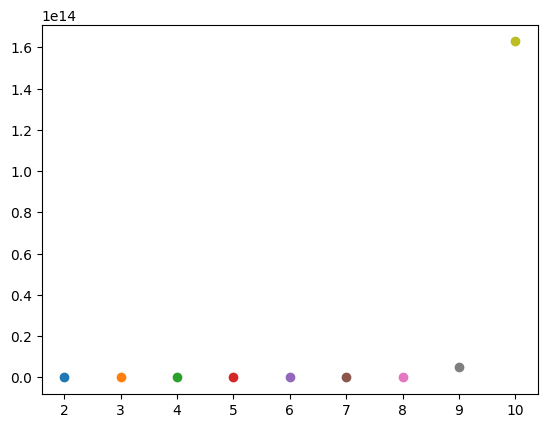

In [40]:
n=11
for i in range(2,n):
    cond_num = hilbert_estimated_cov_condition_num(i)
    plt.plot(i,cond_num, "o")

2. Considere $x=[123456789101112131415]$. Defina $b=H_{15} x y$ resuelva numéricamente el sistema con la forma $x=H^{-1} b$. ¿Qué conclusión obtiene? Busque alternativas para resolver el problema observado.